# **decision tree / random Forest**

Attention: 
- I renamed the columns by replace spaces with underscores. This might make error-messages


In [91]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns


df=pd.read_csv('Carbon_Emission.csv',sep=";")

# change display settings to show all columns
pd.set_option('display.max_columns', None)

# rename columns: replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

df.head()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


# sorting the variables into groups


| variable type| variables | scaling  |
| -----------  | ----------- | ----------- |
|dependent variable |  CarbonEmission |   |
|Quantitative Variables |  Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV, PC Daily, Hour How Many New Clothes Monthly, How Long Internet Daily Hour |   |
| Ordinal Variables | Body_Type, Diet, How_Often_Shower, Social_Activity, Frequency_of_Traveling_by_Air, Waste_Bag_Size, Energy_efficiency | OrdinalEncoder (*) |
| Nominal Variables, with one answer | 'Sex', 'Heating_Energy_Source', 'Transport', 'Vehicle Type' | OneHotEncoder (drop 'Sex_male' and drop NaN in 'Vehicle Type') |
| Nominal Variables, with multiple (or zero) answers  | Recycling, Cooking_With | OneHotEncoder (drop Cooking_with_Airfryer)  |

(*) we want for Body-type:'underweight'=0, 'normal'=1, 'overweight'=2, 'obese'=3. with OrdinalEncoder of Scikit-learn we get: normal: 0, obese: 1, overweight: 2, underweigt: 3 - that would be wrong. chatGPT said there is no tool in Scikit-learn to help me so i do the encoding manually

In [92]:
#variables_ordinal =df.select_dtypes(include=['object','category']).drop(['Transport','Vehicle_Type','Recycling','Cooking_With','Sex'],axis=1).columns.tolist()
variables_ordinal = ['Body_Type','Diet','How_Often_Shower','Social_Activity','Frequency_of_Traveling_by_Air','Waste_Bag_Size','Energy_efficiency']

#variables_quantitative =df.select_dtypes(include=[np.number]).drop('CarbonEmission',axis=1).columns.tolist()
variables_quantitative = ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']

dummy_variables = set()

# Encoding

### Encoding: ordinal variables

In [93]:
#ordering values of ordinal variables
dict_variables_ordinal_categorical = {
    'Body_Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['vegan','vegetarian','pescatarian','omnivore'],
    'How_Often_Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social_Activity': ['never', 'sometimes','often'],
    'Frequency_of_Traveling_by_Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste_Bag_Size': ['small','medium', 'large', 'extra large'],
    'Energy_efficiency': ['Yes', 'Sometimes', 'No']
}

df.tail()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574
9999,obese,male,pescatarian,twice a day,wood,private,electric,sometimes,115,never,9952,small,4,11,6,0,Sometimes,"['Plastic', 'Glass', 'Metal']","['Oven', 'Grill', 'Airfryer']",826


In [94]:
#!!! error-potential: this makes NaN if run a second time!!!

# Custom mapping for ordinal encoding based on defined order
for column, column_ordering in dict_variables_ordinal_categorical.items():
   mapping = {category: idx for idx, category in enumerate(column_ordering)}
   df[column] = df[column].map(mapping)
df.tail()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
9995,3,male,3,2,coal,private,hybrid,1,230,0,268,1,5,12,27,9,0,[],['Microwave'],2408
9996,1,female,0,2,coal,private,lpg,0,234,2,5316,3,3,14,8,24,1,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,2,female,1,1,electricity,walk/bicycle,NaN,1,298,3,96,3,5,11,5,24,0,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,0,male,0,3,coal,private,petrol,2,179,1,8688,1,5,19,14,5,1,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574
9999,3,male,2,2,wood,private,electric,1,115,0,9952,0,4,11,6,0,1,"['Plastic', 'Glass', 'Metal']","['Oven', 'Grill', 'Airfryer']",826


### dummy variables for: 'Sex', 'Heating_Energy_Source', 'Transport', 'Vehicle Type' 

In [95]:
#shorter code would be:

#df = pd.get_dummies(df, columns=['Transport', 'Heating_Energy_Source', 'Vehicle_Type','Sex'], dummy_na=False)     #makes an error if run 2 times    #dummy_na=False: Prevents the creation of dummy variables for NaN values.
#dummy_variables.update(df.select_dtypes(include='bool').drop(columns='Sex_male').columns.tolist())   #list of all dummy-variables with type Bool

In [96]:
#column 'Sex'
df['Sex_female'] = df['Sex'].apply(lambda x: 1 if 'female' == x else 0)
dummy_variables.update(['Sex_female'])

###########################################################################################

#column 'Transport','Heating_Energy_Source', 'Vehicle_Type':
for column in ['Transport','Heating_Energy_Source','Vehicle_Type']:      

    unique_values_clumn = list(df[column].dropna().unique())  #.dropna() Prevents the creation of dummy variables for NaN values in 'Vehicle_Type'
    
    for item in unique_values_clumn:
        df[str(column) + "_" + str(item)] = df[column].apply(lambda x: 1 if item == x else 0)

    ##create list of dummy-variables for lineare Regression
    new_columns=[str(column) + "_" +str(item) for item in unique_values_clumn] #liste mit Spalten-Namen
    dummy_variables.update(new_columns)

###########################################################################################

df[['Sex','Transport','Heating_Energy_Source','Vehicle_Type']+list(dummy_variables)]


13 dummy-variables:
 {'Heating_Energy_Source_electricity', 'Vehicle_Type_petrol', 'Vehicle_Type_electric', 'Heating_Energy_Source_coal', 'Heating_Energy_Source_natural gas', 'Vehicle_Type_hybrid', 'Transport_public', 'Heating_Energy_Source_wood', 'Vehicle_Type_lpg', 'Sex_female', 'Transport_walk/bicycle', 'Transport_private', 'Vehicle_Type_diesel'}


,Sex,Transport,Heating_Energy_Source,Vehicle_Type,Heating_Energy_Source_electricity,Vehicle_Type_petrol,Vehicle_Type_electric,Heating_Energy_Source_coal,Heating_Energy_Source_natural gas,Vehicle_Type_hybrid,Transport_public,Heating_Energy_Source_wood,Vehicle_Type_lpg,Sex_female,Transport_walk/bicycle,Transport_private,Vehicle_Type_diesel
0,female,public,coal,NaN,0,0,0,1,0,0,1,0,0,1,0,0,0
1,female,walk/bicycle,natural gas,NaN,0,0,0,0,1,0,0,0,0,1,1,0,0
2,male,private,wood,petrol,0,1,0,0,0,0,0,1,0,0,0,1,0
3,male,walk/bicycle,wood,NaN,0,0,0,0,0,0,0,1,0,0,1,0,0
4,female,private,coal,diesel,0,0,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,male,private,coal,hybrid,0,0,0,1,0,1,0,0,0,0,0,1,0
9996,female,private,coal,lpg,0,0,0,1,0,0,0,0,1,1,0,1,0
9997,female,walk/bicycle,electricity,NaN,1,0,0,0,0,0,0,0,0,1,1,0,0
9998,male,private,coal,petrol,0,1,0,1,0,0,0,0,0,0,0,1,0


### dummy-variables for: "Recycling" and "Cooking_With"

In [97]:
## dummy-variables for Recycling
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Recycling-Möglichkeiten
for item in unique_values_Recycling:
    df['Recycling_'+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

## dummy-variables for Cooking-with
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Cooking_With-Möglichkeiten
unique_values_cooking_With.remove("Airfryer") #delete Cooking_with_Airfryer
for item in unique_values_cooking_With:
    df['Cooking_With_'+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)

##########################################################################################

##create list of dummy-variables for Regression

columns_recycling=['Recycling_'+str(item) for item in unique_values_Recycling] #liste mit Spalten-Namen
dummy_variables.update(columns_recycling)

columns_cooking_with=['Cooking_With_'+str(item) for item in unique_values_cooking_With] #liste mit Spalten-Namen
dummy_variables.update(columns_cooking_with)

##########################################################################################


df.iloc[282:284, -13:] 

21 dummy-variables:
 {'Vehicle_Type_petrol', 'Cooking_With_Microwave', 'Heating_Energy_Source_natural gas', 'Transport_public', 'Cooking_With_Stove', 'Cooking_With_Oven', 'Vehicle_Type_diesel', 'Recycling_Plastic', 'Cooking_With_Grill', 'Transport_walk/bicycle', 'Vehicle_Type_electric', 'Heating_Energy_Source_coal', 'Vehicle_Type_hybrid', 'Recycling_Paper', 'Vehicle_Type_lpg', 'Sex_female', 'Recycling_Metal', 'Transport_private', 'Heating_Energy_Source_electricity', 'Heating_Energy_Source_wood', 'Recycling_Glass'}


,Vehicle_Type_petrol,Vehicle_Type_diesel,Vehicle_Type_hybrid,Vehicle_Type_lpg,Vehicle_Type_electric,Recycling_Metal,Recycling_Glass,Recycling_Plastic,Recycling_Paper,Cooking_With_Microwave,Cooking_With_Grill,Cooking_With_Stove,Cooking_With_Oven
282,0,0,0,0,0,1,0,1,1,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,1,1,0


# 1.model: deciding on a tree that is later drawn in Word

In [98]:


X = df[variables_quantitative + variables_ordinal + list(dummy_variables)]

 

7 ordinal variables:
 ['Body_Type', 'Diet', 'How_Often_Shower', 'Social_Activity', 'Frequency_of_Traveling_by_Air', 'Waste_Bag_Size', 'Energy_efficiency']
6 quantitative variables:
 ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']
21 dummy-variables:
 {'Vehicle_Type_petrol', 'Cooking_With_Microwave', 'Heating_Energy_Source_natural gas', 'Transport_public', 'Cooking_With_Stove', 'Cooking_With_Oven', 'Vehicle_Type_diesel', 'Recycling_Plastic', 'Cooking_With_Grill', 'Transport_walk/bicycle', 'Vehicle_Type_electric', 'Heating_Energy_Source_coal', 'Vehicle_Type_hybrid', 'Recycling_Paper', 'Vehicle_Type_lpg', 'Sex_female', 'Recycling_Metal', 'Transport_private', 'Heating_Energy_Source_electricity', 'Heating_Energy_Source_wood', 'Recycling_Glass'}


In [99]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor

y = df["CarbonEmission"]

##### Splitting the dataset into train and test set ########################################
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

# Implementing the DecisionTree model ######################################################
model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5) #max_depth=3 , min_samples_leaf=5
model.fit(X_train, y_train)

    ##Evaluating the Model  ######################################################
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable for the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create a DataFrame with the results
pd.DataFrame({
    'R-squared': [
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ],
    'Mean Squared Error': [
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ]
}, index=['Training Set Evaluation', 'Test Set Evaluation'])

,R-squared,Mean Squared Error
Training Set Evaluation,0.720669,292857.161489
Test Set Evaluation,0.701927,296680.551075


### see the tree

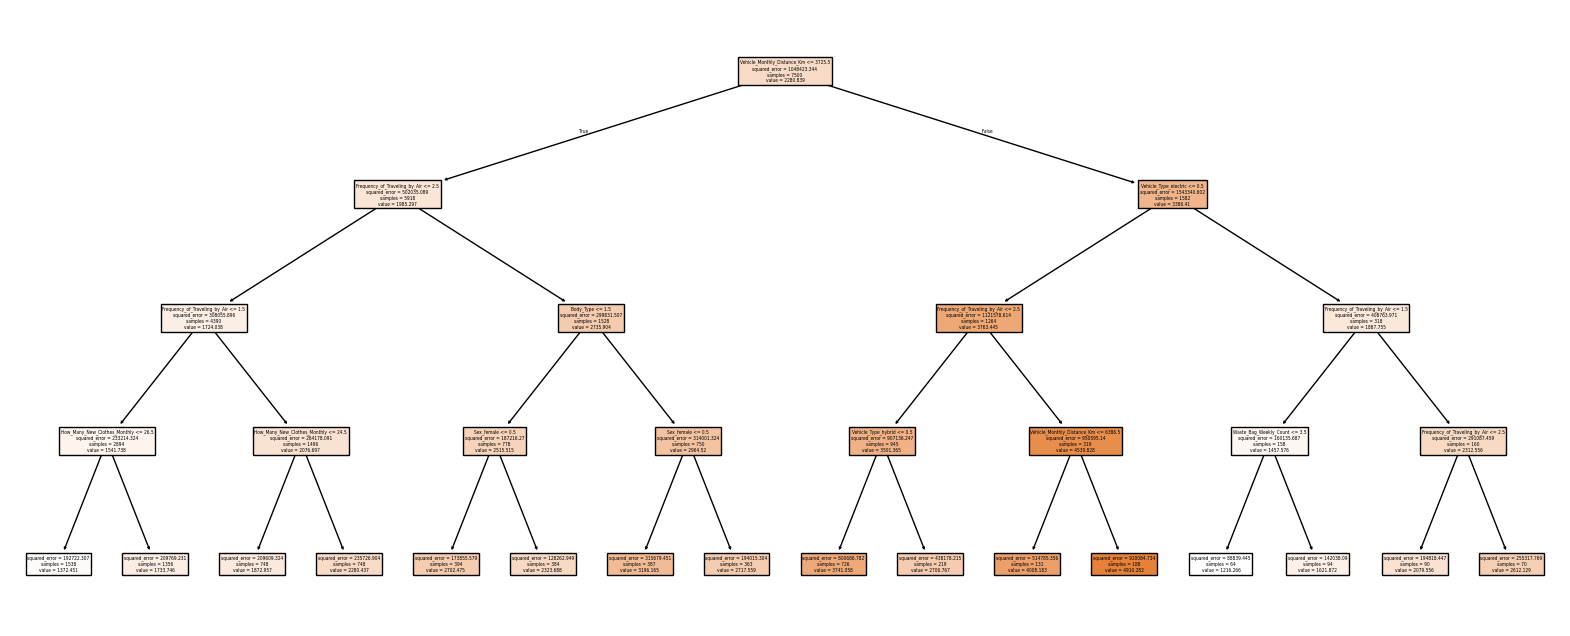

In [100]:


# chatGPT did the programming for me for the plot
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree


#tree.plot_tree(model)
plt.figure(figsize=(20, 8)) # Optional: Set the figure size.       #figsize=(20, 8) for (max_depth=3, min_samples_leaf=5), figsize=(110, 28) for (max_depth=6, min_samples_leaf=5)
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


### prediction

In [101]:
#for (max_depth=3, min_samples_leaf=5) - people in the 2nd box from the right:
filtered_df = df[
    (df['Vehicle_Monthly_Distance_Km'] > 3219) &
    (df['Vehicle_Type'] == 'electric') &
    (df['Frequency_of_Traveling_by_Air'] <= 1.5)
]

# loc[:, X.columns] = Select the relevant columns based on X.columns  - otherwise i will get an error-message
X_pred = filtered_df.loc[:, X.columns].head()
y_pred = model.predict(X_pred)
print("Predicted CarbonEmission: ", y_pred)
filtered_df.head()

Predicted CarbonEmission:  [1216.265625   1621.87234043 1372.45058518 1621.87234043 1216.265625  ]


,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,Sex_female,Transport_public,Transport_walk/bicycle,Transport_private,Heating_Energy_Source_coal,Heating_Energy_Source_natural gas,Heating_Energy_Source_wood,Heating_Energy_Source_electricity,Vehicle_Type_petrol,Vehicle_Type_diesel,Vehicle_Type_hybrid,Vehicle_Type_lpg,Vehicle_Type_electric,Recycling_Metal,Recycling_Glass,Recycling_Plastic,Recycling_Paper,Cooking_With_Microwave,Cooking_With_Grill,Cooking_With_Stove,Cooking_With_Oven
46,0,male,2,0,wood,private,electric,0,209,0,9555,2,2,13,43,3,0,"['Paper', 'Glass', 'Metal']","['Oven', 'Microwave', 'Grill', 'Airfryer']",1188,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1
111,1,female,0,1,electricity,private,electric,0,162,1,9159,0,7,2,26,16,2,[],['Microwave'],1122,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
124,1,female,2,3,wood,private,electric,2,146,1,3276,3,1,13,10,10,2,"['Paper', 'Plastic', 'Glass', 'Metal']","['Stove', 'Microwave']",877,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,0
138,2,male,2,3,wood,private,electric,1,247,0,8219,3,5,18,2,5,1,['Glass'],"['Stove', 'Oven']",1708,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
149,3,female,3,0,natural gas,private,electric,2,125,0,5168,0,3,1,40,17,2,"['Paper', 'Plastic']","['Stove', 'Oven']",1552,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1


### save the model in pkl-format

In [102]:
# chatGPT did the programming

#Speichern des ColumnTransformers und des Modells in getrennten Dateien

import pickle

#with open('encoder_decision_tree.pkl', 'wb') as cf_file: #ColumnTransformers 
#    pickle.dump(cf, cf_file)

#with open('model_decision_tree.pkl', 'wb') as model_file: #Modell
#    pickle.dump(model, model_file)

# 2.model: for Falko

#### make the model

In [103]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.tree import DecisionTreeRegressor

#y = df["CarbonEmission"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,train_size=0.75,)

clf = GridSearchCV(DecisionTreeRegressor(), param_grid = {
    'max_depth': [9,12,15],
    'min_samples_leaf': [30,50] #werden nicht mehr aufgeteilt wenn nur noch x Leute noch drinnen sind
}, cv = RepeatedKFold(n_splits = 4)) 

clf.fit(X_train2, y_train2)

clf

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=4, random_state=None),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [9, 12, 15],
                         'min_samples_leaf': [30, 50]})

#### evaluate 

In [104]:
  ##Evaluating the Model  ######################################################
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable for the training and test sets
y_train_pred2 = clf.predict(X_train2)
y_test_pred2 = clf.predict(X_test2)

# Create a DataFrame with the results
pd.DataFrame({
    'R-squared': [
        r2_score(y_train2, y_train_pred2),
        r2_score(y_test2, y_test_pred2)
    ],
    'Mean Squared Error': [
        mean_squared_error(y_train2, y_train_pred2),
        mean_squared_error(y_test2, y_test_pred2)
    ]
}, index=['Training Set Evaluation', 'Test Set Evaluation'])

,R-squared,Mean Squared Error
Training Set Evaluation,0.872618,133681.562223
Test Set Evaluation,0.836406,162502.544341


In [106]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [ ]:
#Hyperparameter
pd.DataFrame(clf.cv_results_)[['mean_test_score','param_max_depth','param_min_samples_leaf','rank_test_score']]

#### see the tree

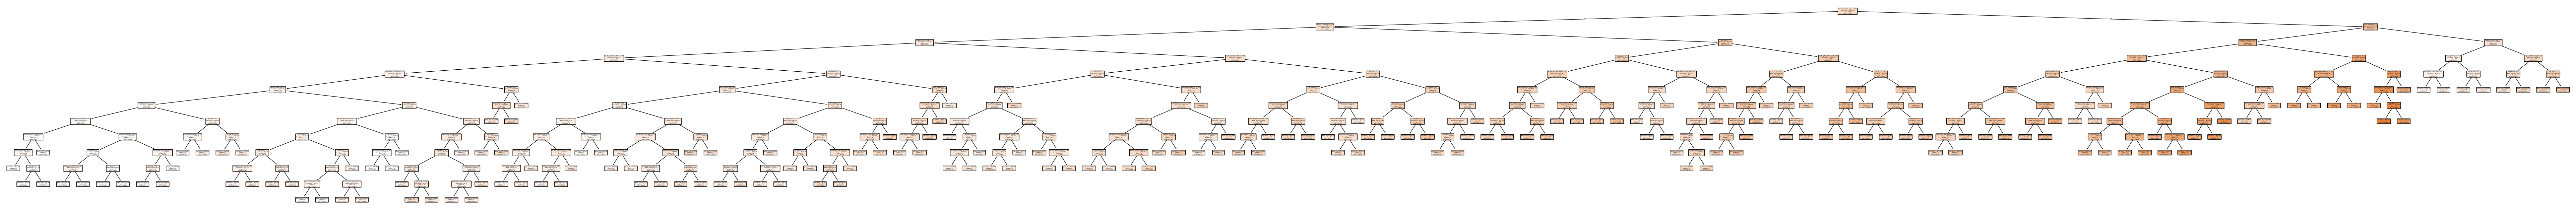

In [107]:
#chatGPT did the programming for me

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


#ich bin mir nicht sicher ob das hier stimmt!!!
# Beste Parameter aus GridSearchCV verwenden
best_model = clf.best_estimator_

# Plot the decision tree
plt.figure(figsize=(100, 8))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

